# Data Preparation Process

Step 1: Select Data

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [11]:
train = pd.read_csv("C:/Users/nbs3/Downloads/train.csv")
test = pd.read_csv("C:/Users/nbs3/Downloads/test.csv")

In [2]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


Step 2: Preprocess Data

In [6]:
train.isnull().any().describe()  #check missing values

count       785
unique        1
top       False
freq        785
dtype: object

In [7]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

Step 3: Transform Data

In [12]:
X_train = []
Y_train = []
X_test = []

# reshape training data from rows into images
for index, row in train.iterrows():
    X_train.append(row.values[1 : ].reshape((28, 28, 1)))
    Y_train.append(row['label'])

# reshape testing data from rows into images
for index, row in test.iterrows():
    X_test.append(row.values.reshape((28, 28, 1)))

# normalization
X_train = np.array(X_train) / 255.
Y_train = np.array(Y_train)
X_test = np.array(X_test) / 255.

Step 4 : Visualisation

There are 42000 training data and 28000 testing data
Number of occurence for each number in training data (0 stands for 10):
[[   0 4132]
 [   1 4684]
 [   2 4177]
 [   3 4351]
 [   4 4072]
 [   5 3795]
 [   6 4137]
 [   7 4401]
 [   8 4063]
 [   9 4188]]


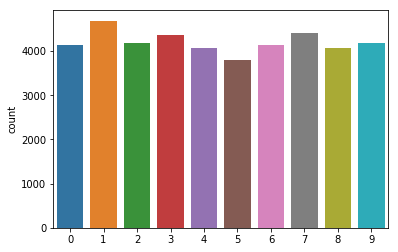

In [13]:
print('There are', X_train.shape[0], 'training data and', X_test.shape[0], 'testing data')
print('Number of occurence for each number in training data (0 stands for 10):')
print(np.vstack((np.unique(Y_train), np.bincount(Y_train))).T)
sns.countplot(Y_train)

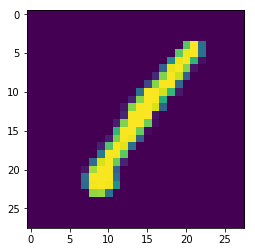

In [16]:
g = plt.imshow(X_train[0][:,:,0])

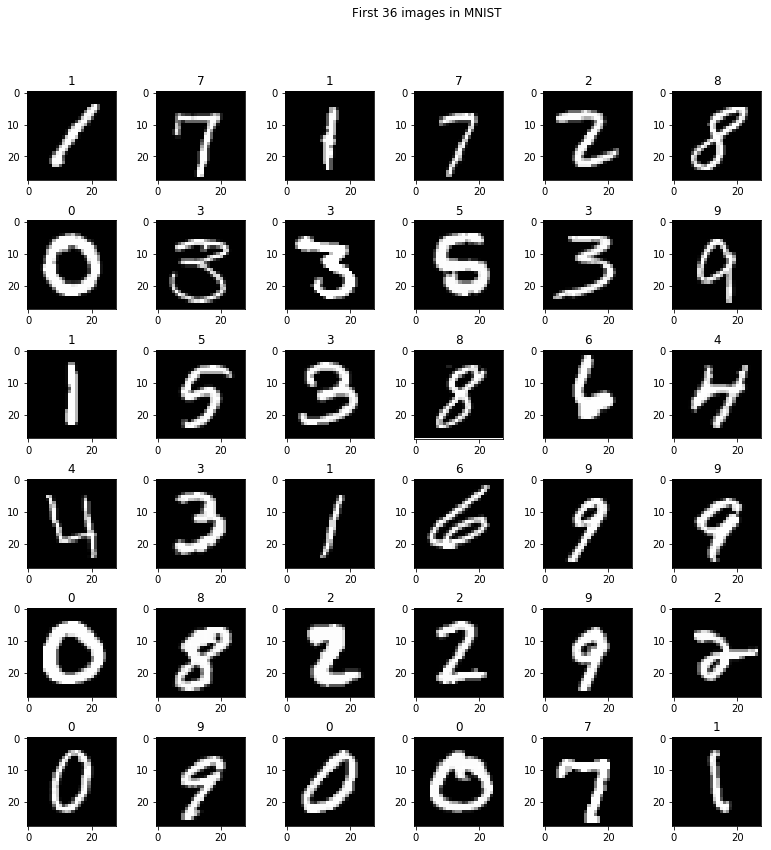

In [18]:
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First 36 Images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(X_train[x + y * 6].reshape((28, 28)), cmap = 'gray')
    ax[x, y].set_title(Y_train[x + y * 6])

# Algorithm training

CNN

Step 1: Split training and valdiation set

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing

# transform training label to one-hot encoding
lb = preprocessing.LabelBinarizer()
lb.fit(Y_train)
Y_train = lb.transform(Y_train)

# split training and validating data
sss = StratifiedShuffleSplit(10, 0.2, random_state = 15)
for train_idx, val_idx in sss.split(X_train, Y_train):
    X_train_tmp, X_val = X_train[train_idx], X_train[val_idx]
    Y_train_tmp, Y_val = Y_train[train_idx], Y_train[val_idx]

X_train = X_train_tmp
Y_train = Y_train_tmp

In [22]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [23]:
img_size = (28, 28, 1)
n_classes = 10

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape = img_size, kernel_initializer = 'normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (5, 5), kernel_initializer = 'normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [24]:
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 0,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False
)

datagen.fit(X_train)

In [25]:
trainedmodel=model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 1000),
                   epochs = 20,
                   validation_data = (X_val, Y_val),
                   steps_per_epoch = X_train.shape[0] / 1000,
                   verbose = 1)

Epoch 1/20
34/33 [==============================] - 114s 3s/step - loss: 1.3332 - acc: 0.5542 - val_loss: 0.3686 - val_acc: 0.9054
Epoch 2/20
34/33 [==============================] - 97s 3s/step - loss: 0.6164 - acc: 0.8081 - val_loss: 0.1591 - val_acc: 0.9565
Epoch 3/20
34/33 [==============================] - 97s 3s/step - loss: 0.4262 - acc: 0.8676 - val_loss: 0.1708 - val_acc: 0.9477
Epoch 4/20
34/33 [==============================] - 106s 3s/step - loss: 0.3369 - acc: 0.8967 - val_loss: 0.1251 - val_acc: 0.9606
Epoch 5/20
34/33 [==============================] - 110s 3s/step - loss: 0.2730 - acc: 0.9183 - val_loss: 0.0917 - val_acc: 0.9724
Epoch 6/20
34/33 [==============================] - 113s 3s/step - loss: 0.2272 - acc: 0.9318 - val_loss: 0.0740 - val_acc: 0.9774
Epoch 7/20
34/33 [==============================] - 111s 3s/step - loss: 0.1982 - acc: 0.9395 - val_loss: 0.0766 - val_acc: 0.9779
Epoch 8/20
34/33 [==============================] - 104s 3s/step - loss: 0.1673 - acc

# Step 2: Model Accuracy

In [26]:
score, acc = model.evaluate(X_val, Y_val, verbose = 1)
model.save('keras_model.h5')

8400/8400 [==============================] - 9s 1ms/step


Step 3: Output confusion Matrix

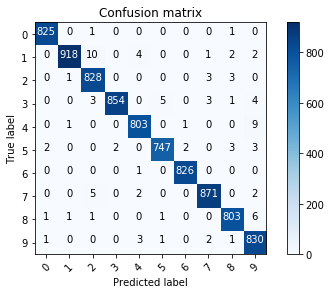

In [32]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 